![img](https://drive.google.com/uc?export=view&id=1kgX98Ziw9LzgBCT2BxChttfrTcBltLej)

# Notebook 1 - Familias florentinas

## Nociones básicas de grafos

En esta notebook vamos a reforzar algunos conceptos básicos de teoríia de grafos vistos en clase, utilizando a modo de ejemplo el dataset "Familias florentinas".

## Descripción del dataset

El dataset consiste en un grafo con 15 nodos y 20 enlaces.

Cada nodo representa una familia importante de la Florencia renacentista, identificada por su apellido. Dos nodos están unidos por un enlace si existió algún matrimonio entre miembros de las correspondientes familias.


<u>Referencias:</u>

- J. F. Padgett and C. K. Ansel, *Robust Action and the Rise of the Medici, 1400-1434*, AJS Volume 98 Number 6 (1993) 1259-1319.

- R. L. Breiger, et al., *Cumulated Social Roles: The Duality of Persons and Their Algebras*, Social Networks 8 (1986) 215-256.

In [1]:
import numpy as np
import pandas as pd

## Librería de grafos
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('talk')

Cargamos el dataset, que está disponible en la misma librería `networkx`.

In [2]:
G = nx.florentine_families_graph()
print(nx.info(G))

Graph with 15 nodes and 20 edges


## Representación del grafo

### Matriz de adyacencia

En un grafo simple y no pesado, la matriz de adyacencia se define de la siguiente forma

$$
A_{ij} = 
\begin{cases}
1 & \text{si existe enlace de } i \text{ a } j \\
0 & \text{caso contrario}
\end{cases}
$$

In [19]:
A = nx.adjacency_matrix(G)
print('Matriz de adjacencia', end='\n\n')
print('A=\n', A.todense())

Matriz de adjacencia

A=
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


### Lista de adyacencia

Cada elemento de la lista representa a un nodo, y contiene el conjunto de vecinos del mismo.

In [4]:
def get_adjacency_list(G):
    """
    Construye la lista de adyacencia del grafo G
    """
    adjlist = []
    for v in G.nodes():
        neighbor_set = set(list(G.neighbors(v)))
        adjlist.append((v, neighbor_set))
    return adjlist

def print_adjacency_list(adjlist):
    """
    Imprime la lista de adyacencia en pantalla
    """
    for v, neighbors in adjlist:
        print(f'{v:14} {neighbors}')

adjlist = get_adjacency_list(G)
print('Lista de adyacencia', end='\n\n')
print_adjacency_list(adjlist)

Lista de adyacencia

Acciaiuoli     {'Medici'}
Medici         {'Tornabuoni', 'Acciaiuoli', 'Albizzi', 'Salviati', 'Barbadori', 'Ridolfi'}
Castellani     {'Barbadori', 'Strozzi', 'Peruzzi'}
Peruzzi        {'Bischeri', 'Castellani', 'Strozzi'}
Strozzi        {'Bischeri', 'Castellani', 'Peruzzi', 'Ridolfi'}
Barbadori      {'Medici', 'Castellani'}
Ridolfi        {'Medici', 'Tornabuoni', 'Strozzi'}
Tornabuoni     {'Medici', 'Guadagni', 'Ridolfi'}
Albizzi        {'Medici', 'Ginori', 'Guadagni'}
Salviati       {'Pazzi', 'Medici'}
Pazzi          {'Salviati'}
Bischeri       {'Guadagni', 'Strozzi', 'Peruzzi'}
Guadagni       {'Tornabuoni', 'Lamberteschi', 'Albizzi', 'Bischeri'}
Ginori         {'Albizzi'}
Lamberteschi   {'Guadagni'}


### Visualización

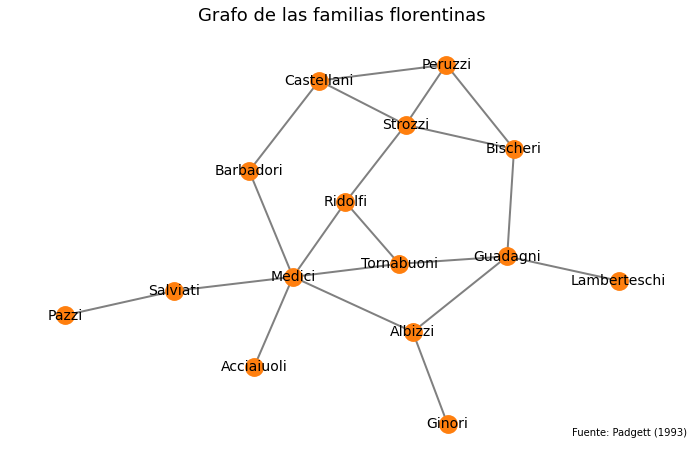

In [24]:
draw_params = dict(
    with_labels=True,               ## Incluye los nombres de los nodos
    node_color='C1',                ## Elijo el color 1 de la paleta de colores
    edge_color='gray',
    width=2,                        ## Espesor de los enlaces
    font_size=14,
    label='Familias florentinas',
    pos=nx.kamada_kawai_layout(G)   ## Algoritmo para embeber el grafo en el plano
)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Grafo de las familias florentinas')
ax.text(0.7, -0.8, 'Fuente: Padgett (1993)')
nx.draw(
    G, 
    ax=ax,
    **draw_params
)

## Estadísticas de los nodos

Construimos un DataFrame de pandas para almacenar la estadística de los nodos

In [6]:
df = pd.DataFrame(index=list(G.nodes()))
df

""
Acciaiuoli
Medici
Castellani
Peruzzi
Strozzi
Barbadori
Ridolfi
Tornabuoni
Albizzi
Salviati


### Distribución de grado

In [8]:
print(G.degree())

[('Acciaiuoli', 1), ('Medici', 6), ('Castellani', 3), ('Peruzzi', 3), ('Strozzi', 4), ('Barbadori', 2), ('Ridolfi', 3), ('Tornabuoni', 3), ('Albizzi', 3), ('Salviati', 2), ('Pazzi', 1), ('Bischeri', 3), ('Guadagni', 4), ('Ginori', 1), ('Lamberteschi', 1)]


In [9]:
deg_seq = np.array([k for v, k in G.degree()])
df['degree'] = deg_seq

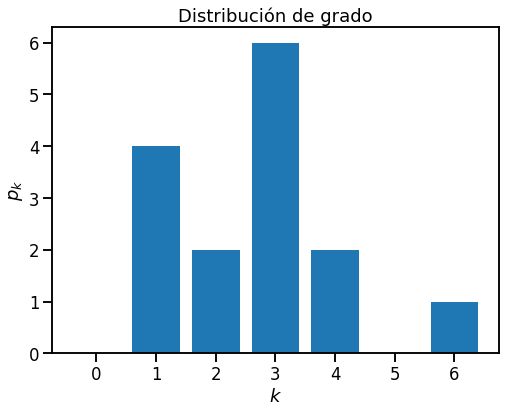

In [10]:
deg_histo = nx.degree_histogram(G)
bins = range(len(deg_histo))

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Distribución de grado')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k$')
ax.bar(bins, deg_histo)
plt.show()

### Centralidad

Calculamos distintas métricas de centralidad y las agregamos como features a nuestro dataframe

In [11]:
betweenness = nx.betweenness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)
closeness = nx.closeness_centrality(G)
clustering_coefficient = nx.clustering(G)

df['betweenness'] = list(betweenness.values())
df['eigenvector'] = list(eigenvector.values())
df['closeness'] = list(closeness.values())
df['Cws'] = list(clustering_coefficient.values())

In [12]:
df

,degree,betweenness,eigenvector,closeness,Cws
Acciaiuoli,1,0.000000,0.132157,0.368421,0.000000
Medici,6,0.521978,0.430315,0.560000,0.066667
Castellani,3,0.054945,0.259020,0.388889,0.333333
Peruzzi,3,0.021978,0.275722,0.368421,0.666667
Strozzi,4,0.102564,0.355973,0.437500,0.333333
Barbadori,2,0.093407,0.211706,0.437500,0.000000
Ridolfi,3,0.113553,0.341554,0.500000,0.333333
Tornabuoni,3,0.091575,0.325847,0.482759,0.333333
Albizzi,3,0.212454,0.243961,0.482759,0.000000
Salviati,2,0.142857,0.145921,0.388889,0.000000


Observamos cuáles son las familias más importantes de acuerdo a cada una de las métricas de centralidad elegidas

In [13]:
columns = ['degree', 'betweenness', 'eigenvector', 'closeness']
data = {}
for col in columns:
    top_families = df.nlargest(3, columns=[col])[col].index
    data[col] = top_families
pd.DataFrame(data)

,degree,betweenness,eigenvector,closeness
0,Medici,Medici,Medici,Medici
1,Strozzi,Guadagni,Strozzi,Ridolfi
2,Guadagni,Albizzi,Ridolfi,Tornabuoni


Volvemos a graficar, incorporando información sobre nodos y enlaces en el gráfico

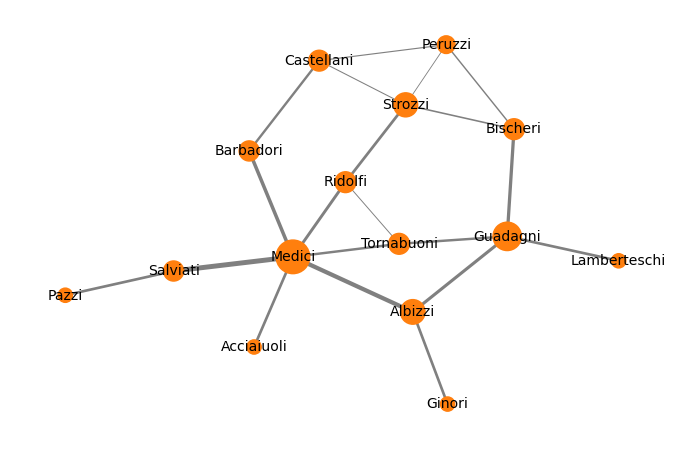

In [14]:
edge_betweenness = np.array(list(nx.edge_betweenness(G).values()))

## El ancho de cada link será proporcional a su betweenness
draw_params['width'] = 20*edge_betweenness
## El tamaño del nodo será proporcional a su grado
draw_params['node_size'] = 200*df['degree']*np.exp(-df['Cws'])

fig, ax = plt.subplots(figsize=(12,8))
nx.draw(
    G, 
    ax=ax,
    **draw_params
)

## Atributos en NetworkX

La librería NetworkX permite agregar atributos a nodos, enlaces o grafos. Esto se puede usar como alternativa a la de construir un dataframe de pandas.

In [25]:
attributes_map = {
    'betweenness': nx.betweenness_centrality,
    'eigenvector': nx.eigenvector_centrality
}
for attribute, attr_method in attributes_map.items():
    attr_values = attr_method(G)
    nx.set_node_attributes(G, attr_values, attribute)

In [26]:
nx.get_node_attributes(G, attribute)

{'Acciaiuoli': 0.1321573195285342,
 'Albizzi': 0.2439605296754477,
 'Barbadori': 0.2117057470647985,
 'Bischeri': 0.2827943958713356,
 'Castellani': 0.2590200378423514,
 'Ginori': 0.0749245316027793,
 'Guadagni': 0.2891171573226501,
 'Lamberteschi': 0.08879253113499548,
 'Medici': 0.4303154258349923,
 'Pazzi': 0.044814939703863084,
 'Peruzzi': 0.2757224374104833,
 'Ridolfi': 0.3415544259074365,
 'Salviati': 0.14592084164171834,
 'Strozzi': 0.3559730326460451,
 'Tornabuoni': 0.325846704169574}